# FX
# USA Gymnast with best chances to medal in fx are:

- Simone Biles
- Ashlee Sullivan

## Scaling - no improvement
## Feature importance no improvement

['ashlee sullivan',
 'ana barbosu',
 'alexa moreno',
 'angela andreoli',
 'simone biles']

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
# from mlxtend.preprocessing import minmax_scaling
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_circles, make_classification, make_moons
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, fbeta_score
from sklearn.dummy import DummyClassifier
import warnings

In [2]:
warnings.filterwarnings("ignore")

In [3]:
# df = pd.read_csv('../../Combine_Data/women/fx_encoded.csv')
olymp = pd.read_csv('../../Data/cleandata22-23/encoded_w_olympics_fx.csv')
fxnames = pd.read_csv('../../Data/cleandata22-23/encoded_w_olympics_fxnames.csv')
fxolymp = pd.read_csv('../../Data/cleandata22-23/women22_23.csv')
df = pd.read_csv('../../Combine_Data/women/mult_fx_encoded.csv')


In [4]:
df=df.drop(columns=['tot_final',
       'tot_fin_d', 'tot_fin_ddiv', 'tot_fin_ddiv_rank'])

In [5]:
olymp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2116 entries, 0 to 2115
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Rank             2116 non-null   float64
 1   D Score          2116 non-null   float64
 2   E Score          2116 non-null   float64
 3   Pen.             2116 non-null   float64
 4   Total            2116 non-null   float64
 5   year             2116 non-null   int64  
 6   Name             2116 non-null   int64  
 7   nation           2116 non-null   int64  
 8   round_aafinal    2116 non-null   bool   
 9   round_final      2116 non-null   bool   
 10  round_qual       2116 non-null   bool   
 11  round_teamfinal  2116 non-null   bool   
 12  round_teamqual   2116 non-null   bool   
dtypes: bool(5), float64(5), int64(3)
memory usage: 142.7 KB


# Base line using ZeroR

In [5]:

X = df.drop(columns=['medal'])  
y = df['medal']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the ZeroR classifier
zero_r_clf = DummyClassifier(strategy='most_frequent', random_state=42)

zero_r_clf.fit(X_train, y_train)

# Make predictions test data
y_pred = zero_r_clf.predict(X_test)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("ZeroR Classifier")
print(f"Accuracy: {accuracy:.4f}")
print(f"Classification Report:\n{report}")
print(f"Confusion Matrix:\n{conf_matrix}")


ZeroR Classifier
Accuracy: 0.9655
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        56
           1       0.00      0.00      0.00         2

    accuracy                           0.97        58
   macro avg       0.48      0.50      0.49        58
weighted avg       0.93      0.97      0.95        58

Confusion Matrix:
[[56  0]
 [ 2  0]]


# Model Comparison


In [6]:
y = df['medal']
X = df.drop(columns=['medal'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize classifiers
classifiers = {
    "Random Forest": RandomForestClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "SVM": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Naive Bayes": GaussianNB(),
    "Neural Network": MLPClassifier(),
}

results = {}

# Iterate through each classifier
for name, clf in classifiers.items():
    # Create a pipeline with StandardScaler for classifiers that require it
    if name in ["SVM", "K-Nearest Neighbors", "Neural Network"]:
        clf = make_pipeline(StandardScaler(), clf)

    # Fit the model to the training data
    clf.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = clf.predict(X_test)

    # Evaluate the model's performance
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

    beta = 2
    f2_score = fbeta_score(y_test, y_pred, beta=beta)

    results[name] = {
        "accuracy": accuracy,
        "classification_report": report,
        "confusion_matrix": conf_matrix,
        "f2_score": f2_score,
    }

# Print the results
for name, result in results.items():
    print(f"Classifier: {name}")
    print(f"Accuracy: {result['accuracy']:.4f}")
    print(f"F2-Score: {result['f2_score']:.4f}")
    print(f"Classification Report:\n{result['classification_report']}")
    print(f"Confusion Matrix:\n{result['confusion_matrix']}\n")


Classifier: Random Forest
Accuracy: 0.9655
F2-Score: 0.5000
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        56
           1       0.50      0.50      0.50         2

    accuracy                           0.97        58
   macro avg       0.74      0.74      0.74        58
weighted avg       0.97      0.97      0.97        58

Confusion Matrix:
[[55  1]
 [ 1  1]]

Classifier: AdaBoost
Accuracy: 0.9483
F2-Score: 0.4545
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97        56
           1       0.33      0.50      0.40         2

    accuracy                           0.95        58
   macro avg       0.66      0.73      0.69        58
weighted avg       0.96      0.95      0.95        58

Confusion Matrix:
[[54  2]
 [ 1  1]]

Classifier: SVM
Accuracy: 0.9655
F2-Score: 0.0000
Classification Report:
              precision    recall  f

# Grid Search k-folds cv No Improvement

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X = df.drop(columns=['medal'])  # Features
y = df['medal']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.16, random_state=42)

# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Random Forest classifier
rf_clf = RandomForestClassifier(random_state=42)

# Initialize StratifiedKFold for k-fold cross-validation
k_folds = 5
stratified_kfold = StratifiedKFold(n_splits=k_folds, shuffle=True, random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_clf, param_grid=param_grid, cv=stratified_kfold, scoring='accuracy', n_jobs=-1)

# Fit the model to the training data with grid search
grid_search.fit(X_train, y_train)

# Get the best parameters from grid search
best_params = grid_search.best_params_

# Initialize the Random Forest classifier with the best parameters
best_rf_clf = RandomForestClassifier(random_state=42, **best_params)

# Iterate over folds for evaluation
for fold, (train_index, test_index) in enumerate(stratified_kfold.split(X_train, y_train)):
    print(f"\nFold {fold + 1}")

    # Split the data into training and testing sets for this fold
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[test_index]

    # Fit the model to the training data with the best parameters for this fold
    best_rf_clf.fit(X_train_fold, y_train_fold)

    # Make predictions on the validation data for this fold
    y_pred = best_rf_clf.predict(X_val_fold)

    # Evaluate the model's performance for this fold
    accuracy = accuracy_score(y_val_fold, y_pred)
    report = classification_report(y_val_fold, y_pred)
    conf_matrix = confusion_matrix(y_val_fold, y_pred)

    print(f"Best Hyperparameters: {best_params}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Classification Report:\n{report}")
    print(f"Confusion Matrix:\n{conf_matrix}")

# Make predictions on the test data
y_pred_test = best_rf_clf.predict(X_test)

# Evaluate the model's performance on the test set
accuracy_test = accuracy_score(y_test, y_pred_test)
report_test = classification_report(y_test, y_pred_test)
conf_matrix_test = confusion_matrix(y_test, y_pred_test)

# Print the results for the test set
print("\nTest Set Results")
print(f"Best Hyperparameters: {best_params}")
print(f"Accuracy: {accuracy_test:.4f}")
print(f"Classification Report:\n{report_test}")
print(f"Confusion Matrix:\n{conf_matrix_test}")



Fold 1
Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}
Accuracy: 0.9184
Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        45
           1       0.00      0.00      0.00         4

    accuracy                           0.92        49
   macro avg       0.46      0.50      0.48        49
weighted avg       0.84      0.92      0.88        49

Confusion Matrix:
[[45  0]
 [ 4  0]]

Fold 2
Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}
Accuracy: 0.9388
Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        45
           1       1.00      0.25      0.40         4

    accuracy                           0.94        49
   macro avg       0.97      0.62      0.68        49
weighted avg       0.94      0.94      0.92   

# Grid Search k-folds cv No Improvement

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X = df.drop(columns=['medal'])  # Features
y = df['medal']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.16, random_state=42)

# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Random Forest classifier
rf_clf = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_clf, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1)

# Fit the model to the training data with grid search
grid_search.fit(X_train, y_train)

# Get the best parameters from grid search
best_params = grid_search.best_params_

# Initialize the Random Forest classifier with the best parameters
best_rf_clf = RandomForestClassifier(random_state=42, **best_params)

# Fit the model to the training data with the best parameters
best_rf_clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = best_rf_clf.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the results
print("Random Forest Classifier with Grid Search")
print(f"Best Hyperparameters: {best_params}")
print(f"Accuracy: {accuracy:.4f}")
print(f"Classification Report:\n{report}")
print(f"Confusion Matrix:\n{conf_matrix}")


Random Forest Classifier with Grid Search
Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}
Accuracy: 0.9574
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        45
           1       0.50      0.50      0.50         2

    accuracy                           0.96        47
   macro avg       0.74      0.74      0.74        47
weighted avg       0.96      0.96      0.96        47

Confusion Matrix:
[[44  1]
 [ 1  1]]


# Model

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X = df.drop(columns=['medal'])  # Features
y = df['medal']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.16, random_state=42)

# Initialize the Random Forest classifier
rf_clf = RandomForestClassifier(random_state=42, n_estimators=2)

# Fit the model to the training data
rf_clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_clf.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the results
print("Random Forest Classifier")
print(f"Accuracy: {accuracy:.4f}")
print(f"Classification Report:\n{report}")
print(f"Confusion Matrix:\n{conf_matrix}")


Random Forest Classifier
Accuracy: 0.9787
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        45
           1       1.00      0.50      0.67         2

    accuracy                           0.98        47
   macro avg       0.99      0.75      0.83        47
weighted avg       0.98      0.98      0.98        47

Confusion Matrix:
[[45  0]
 [ 1  1]]


In [12]:
olymp = pd.read_csv('../../Data/cleandata22-23/encoded_w_olympics_fx.csv')


In [13]:
olymp=olymp.drop(columns=['round_aafinal', 'round_teamfinal'])

In [14]:
olymp['round_0']=False

In [15]:
olymp.columns

Index(['Rank', 'D Score', 'E Score', 'Pen.', 'Total', 'year', 'Name', 'nation',
       'round_final', 'round_qual', 'round_teamqual', 'round_0'],
      dtype='object')

In [16]:
# Define the desired column order
desired_order = ['Rank', 'D Score', 'E Score', 'Pen.', 'Total', 'year', 'Name', 'nation',
       'round_0', 'round_final', 'round_qual']

# Reorder the columns based on the desired order
olymp = olymp[desired_order]

In [17]:

y_pred = rf_clf.predict(olymp)

In [18]:
ypreds  = pd.Series(y_pred)

In [19]:
olymp['ypred']=ypreds

In [20]:
olymp['ypred'].value_counts()

ypred
0    2105
1      11
Name: count, dtype: int64

In [21]:
filtered_df = olymp[olymp['ypred'] == 1]

In [22]:
filtered_df['Name'].unique()

array([ 69,  50, 642,  26, 100])

In [23]:
# List of Name_encoded values to filter by
name_encoded_values = [ 69,  50, 642,  26, 100]
# Create an empty set to store unique names
unique_names = set()

# Iterate through the DataFrame and add unique names to the set
for index, row in fxnames.iterrows():
    if row['Name_encoded'] in name_encoded_values:
        unique_names.add(row['Name'])

# Convert the set of unique names back to a list
unique_names_list = list(unique_names)


In [24]:
unique_names_list

['ashlee sullivan',
 'ana barbosu',
 'alexa moreno',
 'angela andreoli',
 'simone biles']

In [25]:
fxolymp['Name'] = fxolymp['Name'].str.lower()

In [26]:
names_to_find = ['ana barbosu',
 'ashlee sullivan',
 'angela andreoli',
 'simone biles',
 'alexa moreno']


In [27]:
fxolymp['Name']=fxolymp['Name'].str.lower()

In [28]:
result_df = fxolymp[fxolymp['Name'].isin(names_to_find)]

In [29]:
result_df=result_df[result_df['Apparatus']== 'FX']

In [30]:
usa = result_df[result_df['Country']=='USA']

# results

In [31]:
usa['Name'].unique()

array(['simone biles', 'ashlee sullivan'], dtype=object)

---

# Feature Importance - no improvement

AdaBoost Classifier
Accuracy: 0.9545
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        42
           1       0.50      0.50      0.50         2

    accuracy                           0.95        44
   macro avg       0.74      0.74      0.74        44
weighted avg       0.95      0.95      0.95        44

Confusion Matrix:
[[41  1]
 [ 1  1]]


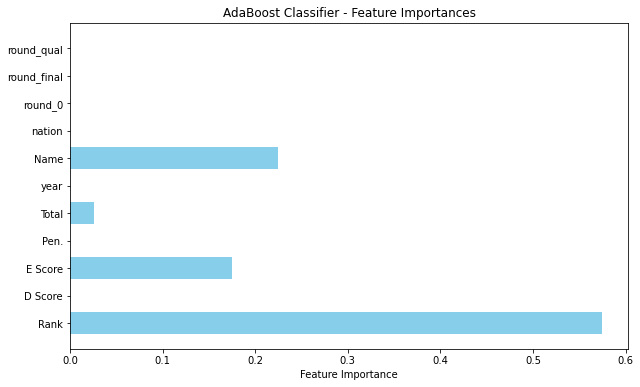

In [32]:
y = df['medal']
X = df.drop(columns=['medal'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15,
                                                    random_state=42)

# Initialize the AdaBoost classifier
clf = AdaBoostClassifier(n_estimators=1000, learning_rate=.00047,
                         random_state=42)

# Fit the model to the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the results
print("AdaBoost Classifier")
print(f"Accuracy: {accuracy:.4f}")
print(f"Classification Report:\n{report}")
print(f"Confusion Matrix:\n{conf_matrix}")

import matplotlib.pyplot as plt

# Extract feature importances
feature_importances = clf.feature_importances_

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(X.columns, feature_importances, color='skyblue')
plt.xlabel('Feature Importance')
plt.title('AdaBoost Classifier - Feature Importances')
plt.show()


In [33]:
# df = pd.read_csv('../../Combine_Data/women/fx_encoded.csv')
olymp = pd.read_csv('../../Data/cleandata22-23/encoded_w_olympics_fx.csv')
fxnames = pd.read_csv('../../Data/cleandata22-23/encoded_w_olympics_fxnames.csv')
fxolymp = pd.read_csv('../../Data/cleandata22-23/women22_23.csv')
df = pd.read_csv('../../Combine_Data/women/mult_fx_encoded.csv')


In [34]:
df=df.drop(columns=['tot_final',
       'tot_fin_d', 'tot_fin_ddiv', 'tot_fin_ddiv_rank'])

In [35]:
feats = df.copy()

In [36]:
df = df.drop(columns=['nation', 'Pen.', 'round_0', 'round_final', 'round_qual'])

In [37]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y = df['medal']
X = df.drop(columns=['medal'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Initialize the K-Nearest Neighbors classifier
knn_clf = KNeighborsClassifier()

# Define the parameter grid for grid search
param_grid = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

# Perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(knn_clf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Use the best estimator from grid search
best_knn_clf = grid_search.best_estimator_

# Make predictions on the test data
y_pred = best_knn_clf.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the results
print("K-Nearest Neighbors Classifier with Grid Search")
print(f"Best Hyperparameters: {grid_search.best_params_}")
print(f"Accuracy: {accuracy:.4f}")
print(f"Classification Report:\n{report}")
print(f"Confusion Matrix:\n{conf_matrix}")


K-Nearest Neighbors Classifier with Grid Search
Best Hyperparameters: {'n_neighbors': 5, 'p': 1, 'weights': 'distance'}
Accuracy: 0.9688
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98        92
           1       0.60      0.75      0.67         4

    accuracy                           0.97        96
   macro avg       0.79      0.86      0.83        96
weighted avg       0.97      0.97      0.97        96

Confusion Matrix:
[[90  2]
 [ 1  3]]


In [38]:
olymp.head(1)

,Rank,D Score,E Score,Pen.,Total,year,Name,nation,round_aafinal,round_final,round_qual,round_teamfinal,round_teamqual
0,109.0,4.4,7.466,0.1,11.766,2022,309,25,False,False,True,False,False


In [39]:
olymp=olymp.drop(columns=['Pen.','nation', 'round_aafinal', 'round_final',
                          'round_qual','round_teamfinal',
                          'round_teamqual'])



In [40]:
y_pred = best_knn_clf.predict(olymp)


In [41]:
ypreds  = pd.Series(y_pred)
olymp['ypred']=ypreds
olymp['ypred'].value_counts()

ypred
0    1808
1     308
Name: count, dtype: int64

In [42]:
filtered_df = olymp[olymp['ypred'] == 1]
filtered_df['Name'].unique()

array([711, 556, 364, 172, 338, 584, 194, 693, 664, 131, 642, 221, 647,
       157, 486, 690, 200, 307, 147, 201, 140, 330, 503, 335, 494, 526,
       403, 404, 659, 350, 366, 525, 527, 272, 470, 592, 593, 267, 230,
       320, 326, 266, 440, 485, 446, 162, 290, 288, 395, 536, 546, 449,
       636, 360, 276, 413, 654, 612, 588, 736, 319, 196, 505, 517, 721,
       348, 146, 246, 553, 488, 234, 601, 269, 544, 545, 685, 275, 382,
       142, 496, 640, 734, 479, 638, 259, 216, 354, 487, 727, 604, 514,
       515, 728, 432, 188, 143, 304, 124, 241, 501, 458, 697, 355, 578,
       376, 333, 332,  66, 580, 620, 361, 560, 248, 186, 373, 256, 254,
       590, 652, 337, 573, 572, 675, 708, 247, 665, 663, 340, 433, 705,
       380, 722, 192, 476, 523, 407, 371, 583, 166, 414, 328, 577, 713,
       243, 680])